In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

c:\Users\anaconda3\envs\test\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
data= pd.read_csv("../dataset/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
Y_dev=data_dev[0]
x_dev=data_dev[1:1000]
x_dev=x_dev/255.0

data_train=data[1000:m].T
Y_train=data_train[0]
x_train=data_train[1:n]
x_train=x_train/255.0
_,m_train=data_train.shape

In [13]:
Y_train

9

In [11]:
x_train.shape

(784, 41000)

In [24]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(
        10, activation='relu', input_shape=(784,)
    ),
    tf.keras.layers.Dense(
        10, activation='relu'
    ),
    tf.keras.layers.Dense(
        10, activation='relu'
    ),
    tf.keras.layers.Dense(
        10, activation='relu'
    ),
    tf.keras.layers.Dense(
        10, activation='relu'
    ),
    tf.keras.layers.Dense(
        10, activation='relu'
    ),
    tf.keras.layers.Dense(
        10, activation='relu'
    ),
    tf.keras.layers.Dense(
        10, activation='relu'
    ),
    tf.keras.layers.Dense(
        10, activation='relu'
    ),
    tf.keras.layers.Dense(
        10, activation='relu'
    ),
    tf.keras.layers.Dense(
        10, activation='relu'
    ),
    tf.keras.layers.Dense(
        10, activation='softmax'
    )
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    x_train.T,    # notice: row-wise samples
    Y_train,
    epochs=100,
    batch_size=32
)


Epoch 1/100
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1328 - loss: 2.2957
Epoch 2/100
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2553 - loss: 1.9331
Epoch 3/100
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4355 - loss: 1.4456
Epoch 4/100
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5696 - loss: 1.1355
Epoch 5/100
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7345 - loss: 0.8453
Epoch 6/100
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8028 - loss: 0.6841
Epoch 7/100
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8413 - loss: 0.5719
Epoch 8/100
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8639 - loss: 0.4891
Epoch 9/100
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8785 - loss: 0.4366
Epoch 10/100
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8884 - loss: 0.4034
Epoch 11/100
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8942 - loss: 0.3781
Epoch 12/100
1282/1

41024/32​=1282...

Training samples = 41,024

Batch size = 32

In [25]:
def make_predictions_tf(model, X):
    """
    X shape: (m, 784) or (1, 784)
    """
    probs = model.predict(X, verbose=0)   # forward pass only
    predictions = np.argmax(probs, axis=1)
    return predictions

import matplotlib.pyplot as plt


def test_prediction_tf(index, model, X_train_tf, Y_train):
    """
    X_train_tf shape: (m, 784)
    """
    # Get one image
    current_image = X_train_tf[index].reshape(1, 784)

    # Prediction
    prediction = make_predictions_tf(model, current_image)
    label = Y_train[index]

    print("Prediction:", prediction[0])
    print("Label:", label)

    # Visualize
    plt.imshow(current_image.reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.show()


Prediction: 0
Label: 0


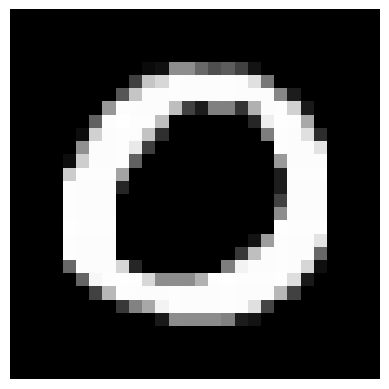

Prediction: 5
Label: 5


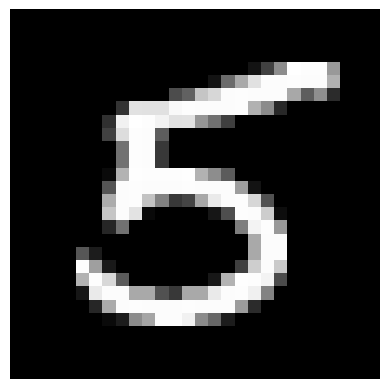

Prediction: 5
Label: 0


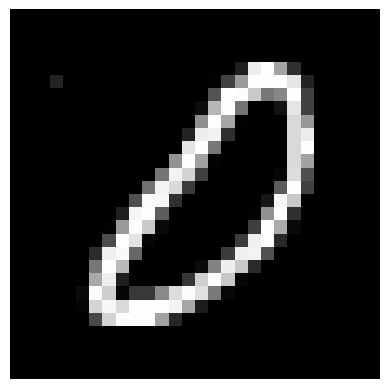

Prediction: 6
Label: 6


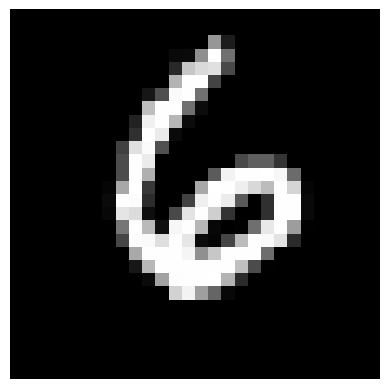

Prediction: 5
Label: 5


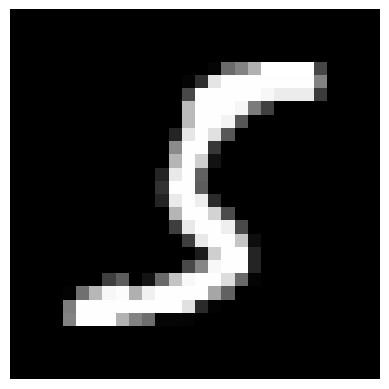

Prediction: 9
Label: 9


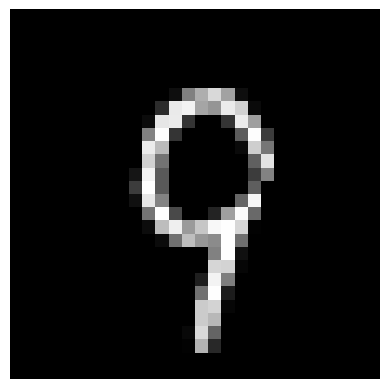

Prediction: 1
Label: 1


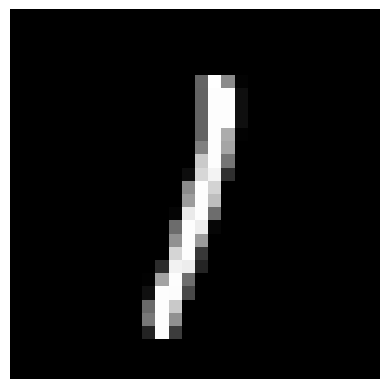

Prediction: 8
Label: 8


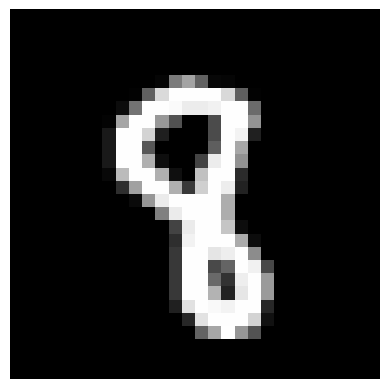

Prediction: 2
Label: 2


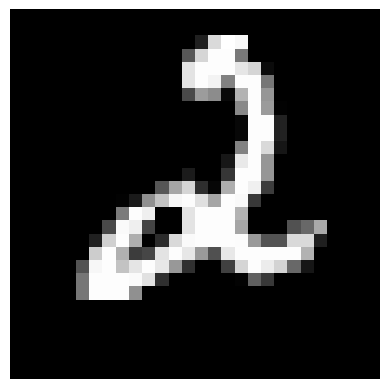

Prediction: 2
Label: 2


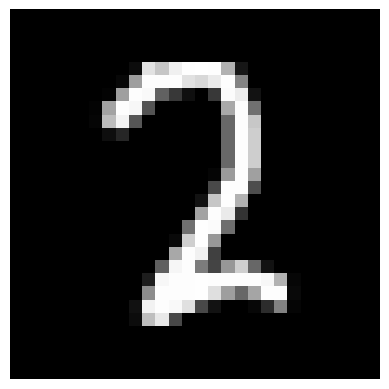

In [28]:
X_train_tf = x_train.T   # convert from (784, m) → (m, 784)

for index in range(0,10):
  test_prediction_tf(
      index,
      model=model,
      X_train_tf=X_train_tf,
      Y_train=Y_train
  )
